<h1>Mid Term Examination</h1>

 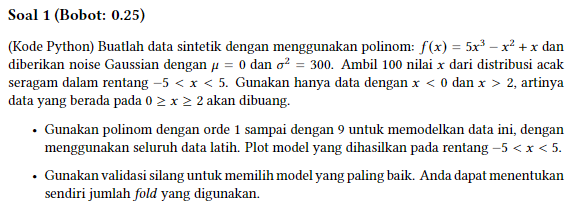

In [ ]:
#Library

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
#Data Sintetik

from scipy.stats import truncnorm
import scipy.stats as stats

def fungsi_polinom(x):
  return 5*x**3 - x**2 + x

lower, upper = -5, 5
data = np.random.uniform(lower, upper, 100)

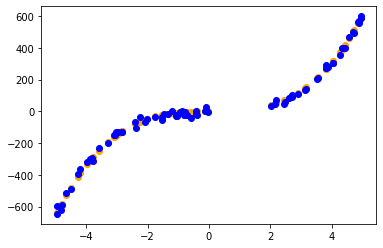

In [ ]:
Y = [] #List nilai f(x)
X = [] #List nilai x
dataset = [] #List nilai x,f(x)

for x in range(len(data)):
  u = data[x]
  if not 0<=u<=2:
    Y.append(fungsi_polinom(u))
    X.append(u)

np.random.seed(13319051) #menggunakan NIM untuk seed
noise = np.random.normal(0, np.sqrt(300),len(X))
Y_noise = Y + noise

for i in range(len(X)):
  u = X[i]
  v = Y_noise[i]
  dataset.append([u,v])

plt.scatter(X,Y,c = "orange")
plt.scatter(X,Y_noise,c = "blue")
plt.show()

**Bagian A**

In [ ]:
#Split data menjadi Data Latih dan Data Validasi
from sklearn.model_selection import train_test_split #diperbolehkan

X= np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y_noise, test_size=0.33, random_state=42)

In [ ]:
def fit_polynomial(x, t, Npoly):
  Ndata = len(x)
  # Npoly is degree of the polynomial
  X = np.zeros( (Ndata,Npoly+1) )
  X[:,0] = 1
  for i in range(1,Npoly+1):
    X[:,i] = np.power( x, i )
  XtX = X.transpose() @ X
  XtXinv = np.linalg.inv(XtX)
  w = XtXinv @ X.transpose() @ t
  return X, w
def predict_polynomial(w, x_eval):
  Npoly = w.shape[0] - 1
  Ndata_eval = x_eval.shape[0]
  # Build X matrix for new input
  X_eval = np.zeros( (Ndata_eval,Npoly+1) )
  X_eval[:,0] = 1.0
  for i in range(1,Npoly+1):
    X_eval[:,i] = np.power( x_eval, i )
  # evaluate
  t_eval = X_eval @ w
  return t_eval

W = []
loss = [0 for i in range(9)]
for Npoly in range(1,10):
  X, w = fit_polynomial(X_train, y_train, Npoly)
  W.append(w)
  t_val_pred = predict_polynomial(w, X_test)
  loss_w = np.sum( (t_val_pred - y_test)**2/len(y_test) )
  loss[Npoly-1] = loss_w
  print("Orde_Polynom = %2d , loss = %10.32f" % (Npoly, loss_w))

Orde_Polynom =  1 , loss = 9115.19937994016072480008006095886230
Orde_Polynom =  2 , loss = 9543.77102985602869011927396059036255
Orde_Polynom =  3 , loss = 278.25879840996992697910172864794731
Orde_Polynom =  4 , loss = 270.90920341560325823593302629888058
Orde_Polynom =  5 , loss = 266.99362918805377375974785536527634
Orde_Polynom =  6 , loss = 283.91956635124319063834263943135738
Orde_Polynom =  7 , loss = 328.97005628757102613235474564135075
Orde_Polynom =  8 , loss = 311.88551593435755648897611536085606
Orde_Polynom =  9 , loss = 315.98842002581352517154300585389137


# This is a polynomial of order 2.
# This is a polynomial of order 3.
# This is a polynomial of order 4.
# This is a polynomial of order 5.
# This is a polynomial of order 6.
# This is a polynomial of order 7.
# This is a polynomial of order 8.
# This is a polynomial of order 9.
# This is a polynomial of order 10.


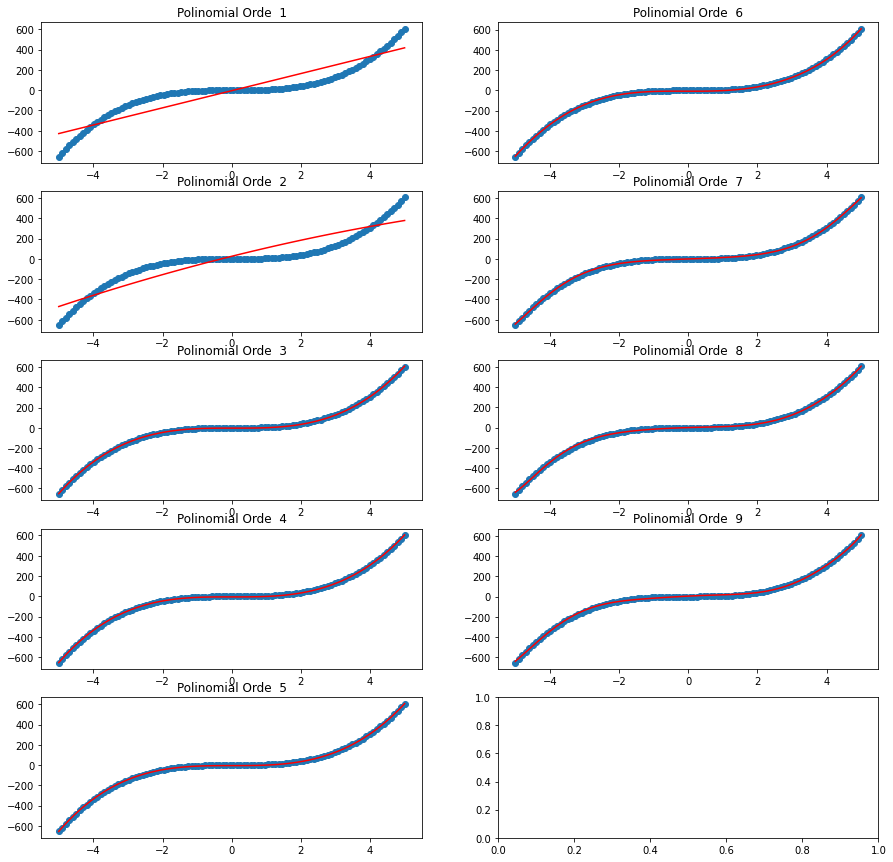

In [ ]:
#Plot Setiap Polinomial

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.

    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    print(f'# This is a polynomial of order {o}.')
    y = np.zeros(len(x))
    for i in range(o):
      for j in range(len(x)):
        y[j] += coeffs[i]*x[j]**i
    return y

figure, ax = plt.subplots(5, 2, figsize = (15, 15))
for Npoly in range(0,9):
  xr = np.linspace(-5,5, 100)
  if Npoly > 4:
    ax[Npoly-5,1].plot(xr, PolyCoefficients(xr, W[Npoly]), c = "red")
    ax[Npoly-5,1].scatter(xr, fungsi_polinom(xr))
    ax[Npoly-5,1].set_title("Polinomial Orde %2d"%(Npoly+1))
  else:
    ax[Npoly,0].plot(xr, PolyCoefficients(xr, W[Npoly]), c = "red")
    ax[Npoly,0].scatter(xr, fungsi_polinom(xr))
    ax[Npoly,0].set_title("Polinomial Orde %2d"%(Npoly+1))
plt.show()

Dapat Dilihat Dari Grafik Di atas dan loss function bahwa grafik polinomial orde >= 3 yang memiliki representasi terbaik terhadap fungsi Polinom

**Bagian B**

Didapatkan bahwa model K-Fold terbaik adalah pada iterasi ke - 4 orde ke 6, loss = 66.680230
# This is a polynomial of order 8.


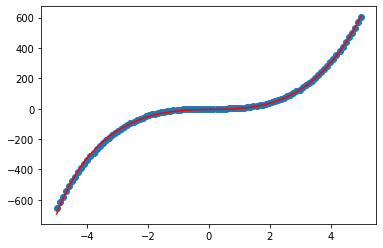

In [ ]:
#cross-Validation with K-Folds

k = 5 #Number of k
folds = np.array_split(dataset, k) #Split the data with K-Folds

w_kf = []
loss_kv = []
for i in range(k):
    train = folds.copy() # you wanna work on a copy of your array
    test = folds[i]
    del train[i]
    train = np.concatenate(train, axis = 0)

    #array to list
    train = train.tolist()
    test = test.tolist()

    x_traine = [0 for z in range(len(train))]
    y_traine = [0 for z in range(len(train))]

    for l in range(len(train)):
        x_traine[l], y_traine[l] = train[l][0], train[l][1]

    x_testi = [0 for z in range(len(test))]
    y_testi = [0 for z in range(len(test))]

    for m in range(len(test)):
      x_testi[m], y_testi[m] = test[m][0], test[m][1]

    x_testi = np.array(x_testi)
    loss_iterasi = [0 for n in range(9)]
    w_k = []
    for Npoly in range(1,10):
        X, w = fit_polynomial(x_traine, y_traine, Npoly)
        w_k.append(w)
        t_val_pred = predict_polynomial(w, x_testi)
        loss_i = np.sum( (t_val_pred - y_testi)**2/len(y_testi) )
        loss_iterasi[Npoly-1] = loss_i
    loss_kv.append(loss_iterasi)
    w_kf.append(w_k)

#Mencari model terbaik dengan mencari loss terkecil
iterasi = 0
pol = 0
loss_value = 1e5
for i in range(k):
  for j in range(9):
    u = loss_kv[i][j]
    if u < loss_value:
      iterasi = i+1
      pol = j+1
      loss_value = u

print("Didapatkan bahwa model K-Fold terbaik adalah pada iterasi ke -%2d orde ke%2d, loss = %.6f"%(iterasi, pol, loss_value ))

xr = np.linspace(-5,5,100)
plt.scatter(xr, fungsi_polinom(xr))
plt.plot(xr, PolyCoefficients(xr, w_kf[iterasi][pol]), c = "red")
plt.show()

**Nomor 2** <br>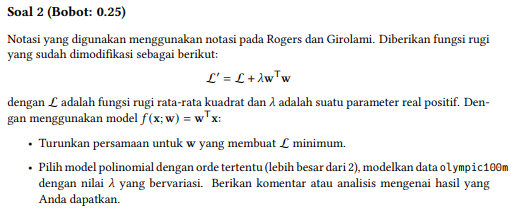

Berikut ini adalah penurunan persamaan untuk **w** yang membuat *L* minimum

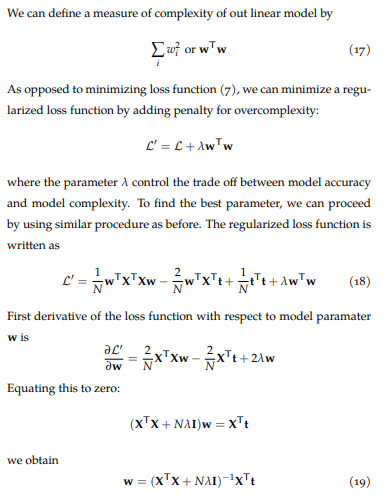

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving olympic100m.txt to olympic100m.txt


In [ ]:
# Load the data
DATAPATH = "olympic100m.txt"
data = np.loadtxt(DATAPATH, delimiter=",")

In [ ]:
t_full = data[:,1] # Target
x_full = data[:,0]
# Data indices for validation and training data

idx_val = x_full > 1979
idx_train = x_full <= 1979
#
x_val = x_full[idx_val]
t_val = t_full[idx_val]

#
x = x_full[idx_train]
t = t_full[idx_train]

# Shift and rescale the data to avoid numerical
# problems with large numbers
x = x - x_full[0]
x = 0.25*x
# also do this for validation input
x_val = x_val - x_full[0]
x_val = 0.25*x_val

W = []
for Npoly in range(1,10):
    X, w = fit_polynomial(x, t, Npoly)
    W.append(w)
    t_val_pred = predict_polynomial(w, x_val)
    loss = np.sum( (t_val_pred - t_val)**2/len(t_val) )
    print("Npoly = %2d loss = %10.5f" % (Npoly, loss))

Npoly =  1 loss =    0.10130
Npoly =  2 loss =    0.16763
Npoly =  3 loss =    1.06188
Npoly =  4 loss =    4.45706
Npoly =  5 loss =    5.51420
Npoly =  6 loss = 1533.43685
Npoly =  7 loss =   61.91358
Npoly =  8 loss = 6023.26806
Npoly =  9 loss = 2342908.94433


Dapat dilihat bahwa pendekatan fungsi dengan orde <= 2 memiliki loss terbaik. Di sini kita mengambil grafik dengan loss yang tidak terlalu baik dan tidak terlalu buruk. Oleh karena itu dipilih **Npoly = 7**

# This is a polynomial of order 2.
# This is a polynomial of order 3.
# This is a polynomial of order 4.
# This is a polynomial of order 5.
# This is a polynomial of order 6.
# This is a polynomial of order 7.
# This is a polynomial of order 8.
# This is a polynomial of order 9.
# This is a polynomial of order 10.


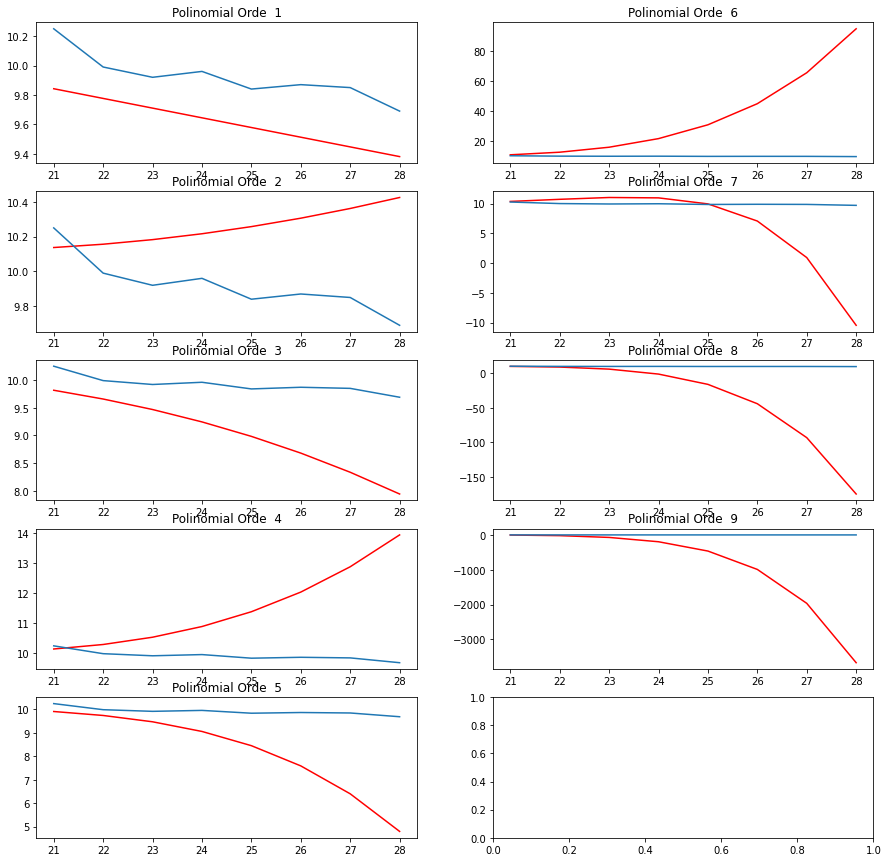

In [ ]:
#Plot Setiap Polinomial

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.

    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    print(f'# This is a polynomial of order {o}.')
    y = np.zeros(len(x))
    for i in range(o):
      for j in range(len(x)):
        y[j] += coeffs[i]*x[j]**i
    return y

figure, ax = plt.subplots(5, 2, figsize = (15, 15))
for Npoly in range(0,9):
  if Npoly > 4:
    ax[Npoly-5,1].plot(x_val, PolyCoefficients(x_val, W[Npoly]), c = "red")
    ax[Npoly-5,1].plot(x_val,t_val)
    ax[Npoly-5,1].set_title("Polinomial Orde %2d"%(Npoly+1))
  else:
    ax[Npoly,0].plot(x_val, PolyCoefficients(x_val, W[Npoly]), c = "red")
    ax[Npoly,0].plot(x_val,t_val)
    ax[Npoly,0].set_title("Polinomial Orde %2d"%(Npoly+1))
plt.show()

λ = 0.000000, loss = 0.01705844
λ = 0.100000, loss = 3.00418448
λ = 0.010000, loss = 0.17672542
λ = 0.001000, loss = 0.02033078
λ = 0.000100, loss = 0.01709616
λ = 0.000010, loss = 0.01705882


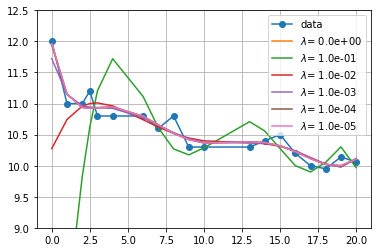

In [ ]:
#Fungsi untuk memprediksi X, w berdasarkan data x, t, Npoly, dan λ
def fit_polynomial_ridge(x, t, Npoly, λ=0.0):
    Ndata = len(x)
    # Npoly is degree of the polynomial
    X = np.zeros((Ndata,Npoly+1))
    X[:,0] = 1.0
    for i in range(1,Npoly+1):
      X[:,i] = np.power( x, i )
    XtX = X.transpose() @ X + Ndata*λ*np.eye(Npoly+1)
    XtXinv = np.linalg.inv(XtX)
    w = XtXinv @ X.transpose() @ t
    return X, w

#Plot data Train dan w hasil fit_polynomial_ridge
Npoly = 7 #Diambil acak karena loss tidak terlalu kecil & besar
plt.clf()
plt.plot(x, t, marker="o", label="data")
for λ in [0.0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]:
  X, w = fit_polynomial_ridge(x, t, Npoly, λ=λ)
  t_eval = predict_polynomial(w, x)
  plt.plot(x, t_eval, label="$\\lambda$={:8.1e}".format(λ))
  loss = np.sum( (t_eval - t)**2/len(t) )
  print("λ = %1.6f, loss = %10.8f" % (λ, loss))
  plt.ylim(9,12.5)
plt.grid(True)
plt.legend()

Dapat dilihat bahwa grafik terbaik adalah nilai yang memiliki loss terbaik yaitu dengan **nilai λ paling kecil**, _namun jangan terkecoh_. Jika kita split data menjadi data_train dan data_validation, maka dapat dilihat bahwa nilai λ terlalu kecil akan membuat overfitting sehingga data_validation memiliki error yang sangat banyak. <br> <br> Perhatikan gambar grafik di bawah!

λ = 0.000000, loss = 61.91358325
λ = 0.100000, loss = 79721.75490085
λ = 0.010000, loss = 678.79210428
λ = 0.001000, loss = 163.01925906
λ = 0.000100, loss = 31.35414179
λ = 0.000010, loss = 58.26025207


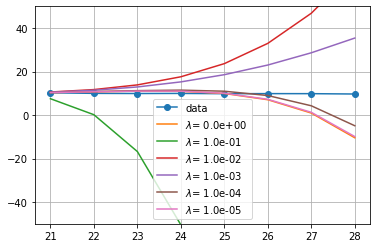

In [ ]:
#Plot data Validasi

plt.plot(x_val, t_val, marker="o", label="data")
for λ in [0.0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]:
  X, w = fit_polynomial_ridge(x, t, Npoly, λ=λ)
  t_eval = predict_polynomial(w, x_val)
  plt.plot(x_val, t_eval, label="$\\lambda$={:8.1e}".format(λ))
  loss = np.sum( (t_eval - t_val)**2/len(t_val) )
  print("λ = %1.6f, loss = %10.8f" % (λ, loss))
  plt.ylim(-50,50)
plt.grid(True)
plt.legend()

**Nah,  terbukti bahwa λ terlalu kecil belum tentu paling representatif !**

**NOMOR 3** <br>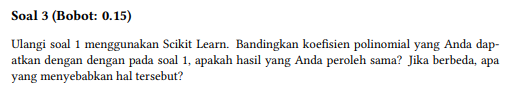

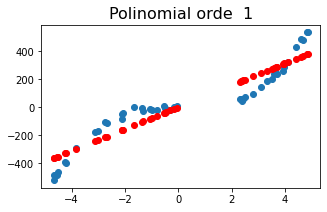

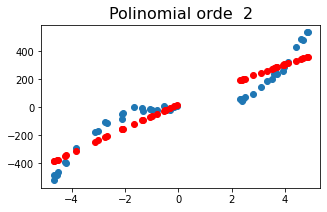

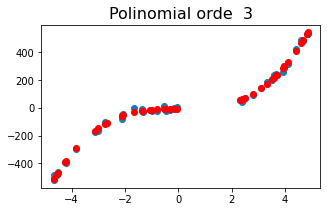

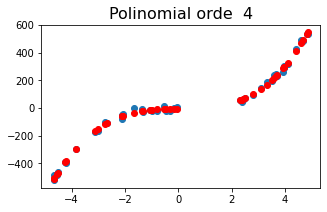

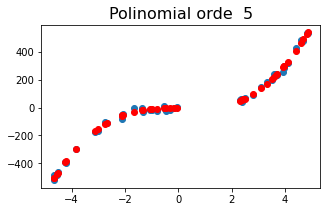

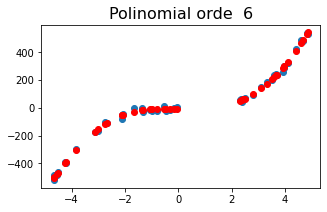

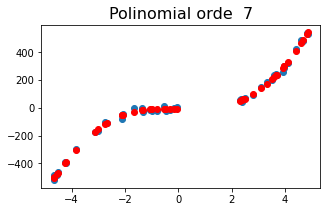

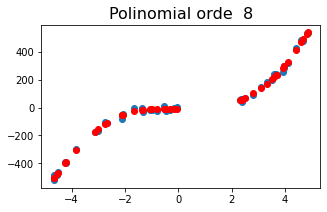

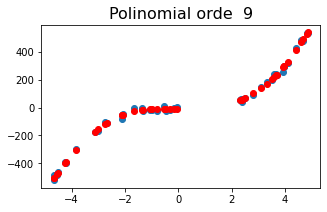

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

W_sklearn = []
loss_sk = [0 for i in range(9)]

for i in range(1,10):
  poly = PolynomialFeatures(degree=i, include_bias=False)
  poly_features = poly.fit_transform(X_train.reshape(-1, 1))
  poly_reg_model = LinearRegression()
  lin_reg_2 = poly_reg_model.fit(poly_features, y_train)
  y_predicted = poly_reg_model.predict(poly_features)
  #Loss
  loss_pr = np.sum( (y_predicted - y_train)**2/len(y_train) )
  loss_sk[i-1] = loss_pr
  #ubah ke list
  lr = lin_reg_2.coef_
  lin_reg_2 = lr.tolist()
  lin_reg_2.append(poly_reg_model.intercept_)
  W_sklearn.append(lin_reg_2)
  #plot polinom
  plt.figure(figsize=(5, 3))
  plt.title("Polinomial orde %2d"%(i), size=16)
  plt.scatter(X_train, y_train)
  plt.scatter(X_train, y_predicted, c="red")
  plt.show()

In [ ]:
#Bandingkan nilai setiap bobot dan plot

for i in range(0,9):
  print("koefisien polinomial orde %2d tanpa sklearn \n "%(i+1), W[i])
  print("koefisien polinomial orde %2d dengan sklearn \n "%(i+1), W_sklearn[i])
  print("loss tanpa sklearn = %10.6f"%(loss[i]))
  print("loss dengan sklearn = %10.6f"%(loss_sk[i]),"\n")

koefisien polinomial orde  1 tanpa sklearn 
  [5.55272826e-02 7.82504140e+01]
koefisien polinomial orde  1 dengan sklearn 
  [78.25041397160815, 0.055527282605087436]
loss tanpa sklearn = 9959.032010
loss dengan sklearn = 8573.541963 

koefisien polinomial orde  2 tanpa sklearn 
  [16.94041446 79.00636549 -1.70291195]
koefisien polinomial orde  2 dengan sklearn 
  [79.00636549055453, -1.7029119539696362, 16.94041445896723]
loss tanpa sklearn = 9211.698162
loss dengan sklearn = 8409.316007 

koefisien polinomial orde  3 tanpa sklearn 
  [-6.91390828  1.73647265 -0.42479842  4.85217303]
koefisien polinomial orde  3 dengan sklearn 
  [1.73647265466248, -0.42479841883364067, 4.852173027037041, -6.913908276346174]
loss tanpa sklearn = 429.753894
loss dengan sklearn = 183.925490 

koefisien polinomial orde  4 tanpa sklearn 
  [-4.67662941  2.26338105 -1.17591602  4.82333508  0.03354733]
koefisien polinomial orde  4 dengan sklearn 
  [2.263381045446036, -1.1759160207496868, 4.823335080421478,

Jika kita melihat koefisien polinom sklearn di atas, nilainya sangat berbeda dengan nilai koefisien polinom model pendekatan nomor 1. Hal ini dikarenakan scikit learn menghasilkan matriks fitur baru yang terdiri dari semua kombinasi polinomial fitur dengan derajat kurang dari atau sama dengan derajat yang ditentukan. <br> <br> Mudahnya scikit learn belajar untuk membuat matrix baru dengan orde kurang dari atau sama dengan orde yang telah ditentukan agar loss yang dihasilkan paling bagus.

**Nomor 4** <br> 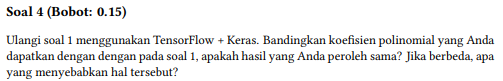

Untuk bagian ini kita akan menggunakan DNN single input sebagai metode untuk mendapatkan koefisien polinomial dan loss-nya untuk dibandingkan dengan model pada soal nomor 1

In [ ]:
#Library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import Sequential, layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import PolynomialFeatures

tf.print(tf. __version__)

2.9.2


In [ ]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
        ])
    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [ ]:
#Normalisasi

#Layer Normalisasi
normalizer = tf.keras.layers.Normalization(input_shape=[1,],axis=None)
#fit data
normalizer.adapt(X_train)

In [ ]:
#Creat DNN Model

x_model = build_and_compile_model(normalizer)

x_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_10 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_37 (Dense)            (None, 32)                64        
                                                                 
 dense_38 (Dense)            (None, 32)                1056      
                                                                 
 dense_39 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,156
Trainable params: 1,153
Non-trainable params: 3
_________________________________________________________________


In [ ]:
#Train the model

%%time
history = x_model.fit(
      X_train,
      y_train,
      validation_split=0.3,
      verbose=0, epochs=10000)

CPU times: user 4min 10s, sys: 10.4 s, total: 4min 20s
Wall time: 4min 16s


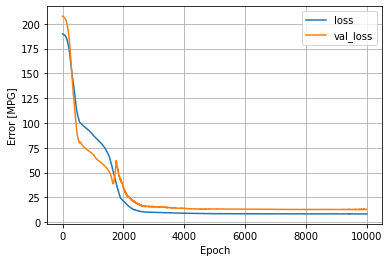

In [ ]:
#Plot Loss

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

4/4 [==============================] - 0s 4ms/step


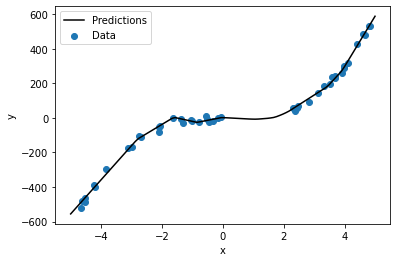

In [ ]:
#Look the prediction

x_pr = tf.linspace(-5, 5, 100)
y_pr = x_model.predict(x_pr)

plt.scatter(X_train, y_train, label='Data')
plt.plot(x_pr, y_pr, color='k', label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Setelah melakukan pelatihan data selama 4m 12s menggunakan DNN dengan 2 hidden layers dan epoch 10000 didapatkan model prediksi yang di plot kan seperti gambar di atas. Dapat dilihat pada grafik loss dan val_loss mean absolute error bahwa nilai-nya cukup rendah dibandingkan loss pada model nomor 1. Namun, harus diketahui bahwa grafik di atas *over-fitting*.

1/1 [==============================] - 0s 75ms/step
Loss (tensorflow + keras) [Loss] =  3401601.843869129
Loss model polinom biasa :
Orde  0 = 9959.032010
Orde  1 = 9211.698162
Orde  2 = 429.753894
Orde  3 = 424.986252
Orde  4 = 433.974501
Orde  5 = 419.317966
Orde  6 = 417.401656
Orde  7 = 421.348916
Orde  8 = 422.921529
1/1 [==============================] - 0s 23ms/step


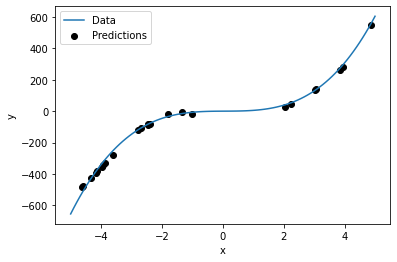

In [ ]:
#Test Result

#Mean Absolute Error
test_results = x_model.evaluate(
    X_test, y_test,
    verbose=0)

#Loss
y_predict = x_model.predict(X_test)
loss_tf = np.sum( (y_predict - y_test)**2/len(y_test) )

print("Loss (tensorflow + keras) [Loss] = ", loss_tf)
print("Loss model polinom biasa :")
for i in range(9):
  print("Orde %2d = %.6f"%(i,loss[i]))

y_predict = x_model.predict(X_test)

plt.plot(x_pr, fungsi_polinom(x_pr), label='Data')
plt.scatter(X_test, y_predict, color='k', label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Dapat dilihat pada gambar di atas bahwa grafik tersebut overfitting terhadap noise yang ada sehingga pada saat test model-nya *over-fitting* dari data

Weight Layers

In [ ]:
#Nilai Weight Setiap Input

print(x_model.layers[0].weights) #Input Layer
print(x_model.layers[1].weights) #Hidden Layer 1
print(x_model.layers[2].weights) #Hidden Layer 2
print(x_model.layers[3].weights) #Output Layer

[<tf.Variable 'mean:0' shape=() dtype=float32, numpy=0.36821175>, <tf.Variable 'variance:0' shape=() dtype=float32, numpy=9.943178>, <tf.Variable 'count:0' shape=() dtype=int64, numpy=47>]
[<tf.Variable 'dense_37/kernel:0' shape=(1, 32) dtype=float32, numpy=
array([[ 1.0703478e+00,  1.0334551e+00, -2.3535390e+00,  2.1856649e+00,
        -1.4019299e-03,  8.6048018e-04, -1.5203813e+00,  2.2678728e+00,
        -1.7600542e+00, -1.3283385e+00, -1.5779526e+00,  1.1303222e+00,
         2.2022388e+00,  2.0486100e+00, -2.1143827e+00, -1.8048724e+00,
         4.1693699e-02, -2.2732019e+00,  1.1340680e+00, -2.2467091e+00,
        -2.3722999e+00, -1.1919924e+00, -1.9712572e+00, -2.2364712e+00,
         1.1642350e+00,  1.6964557e+00,  1.1521775e+00,  2.4768844e+00,
        -1.9487503e+00, -1.6171094e+00,  1.0924450e+00,  1.1190627e+00]],
      dtype=float32)>, <tf.Variable 'dense_37/bias:0' shape=(32,) dtype=float32, numpy=
array([ 1.9703525 ,  1.8144691 , -0.14105959, -0.9947259 , -0.02584981,
   

**Note : Pada model ini kita menggunakan Neural Network yang dimana kita menginginkan regresi dari model kita semirip mungkin dengan data yang diberikan. Pada neural network, ada yang dinamakan** *weight neuron*. **Namun, berbeda dengan koefisien pada regresi polinomial, weight hanya sebuah bobot pada matrix perkalian untuk mendapatkan nilai yang terbaik. Namun, untuk sebuah fungsi polinomial kontinu seperti ini, menggunakan neural network tidak terlalu baik karena modelnya bukan polinom melainkan linear**

**Soal 5** <br> 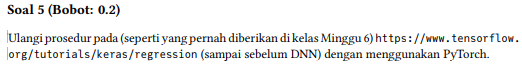

Tujuan dari prosedur Tensorflow di minggu ke-6 adalah linear regression multiple input.
<br>
<br>
Linear Regression Model using PyTorch built-ins

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import torch
import torch.nn as nn

**Get Data**

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


**Clean Data**

In [ ]:
#The dataset contains a few unknown values:

dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
#Drop those rows to keep this initial tutorial simple:

dataset = dataset.dropna()

In [ ]:
'''
The "Origin" column is categorical, not numeric. So the next step is to one-hot
encode the values in the column with pd.get_dummies.

Note: You can set up the tf.keras.Model to do this kind of transformation for you but
that's beyond the scope of this tutorial. Check out the Classify structured data using
Keras preprocessing layers or Load CSV data tutorials for examples
'''

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [ ]:
''''
Bagi jadi Input dan Target.

Di sini kita menginginkan output prediksi MPG (Miles per Galon) dari setiap merk

'''

output = dataset.pop('MPG')

#ubah ke array
dataset = np.array(dataset)
output = np.array(output)

dataset = dataset.astype(np.float32)
output = output.astype(np.float32)

#ubah ke torch
inputs = torch.from_numpy(dataset)
targets = torch.from_numpy(output)

**Dataset and DataLoader**

In [ ]:
# Import tensor dataset & data loader
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[8.0000e+00, 3.0700e+02, 1.3000e+02, 3.5040e+03, 1.2000e+01, 7.0000e+01,
          0.0000e+00, 0.0000e+00, 1.0000e+00],
         [8.0000e+00, 3.5000e+02, 1.6500e+02, 3.6930e+03, 1.1500e+01, 7.0000e+01,
          0.0000e+00, 0.0000e+00, 1.0000e+00],
         [8.0000e+00, 3.1800e+02, 1.5000e+02, 3.4360e+03, 1.1000e+01, 7.0000e+01,
          0.0000e+00, 0.0000e+00, 1.0000e+00]]), tensor([18., 15., 18.]))

In [ ]:
# Define data loader
batch_size = 392
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[  6., 231., 110.,  ...,   0.,   0.,   1.],
         [  4., 140.,  88.,  ...,   0.,   0.,   1.],
         [  6., 231., 105.,  ...,   0.,   0.,   1.],
         ...,
         [  8., 318., 150.,  ...,   0.,   0.,   1.],
         [  8., 455., 225.,  ...,   0.,   0.,   1.],
         [  6., 250.,  72.,  ...,   0.,   0.,   1.]]),
 tensor([17.0000, 25.1000, 20.6000, 23.0000, 34.7000, 43.4000, 17.0000, 39.1000,
         31.3000, 13.0000, 26.6000, 28.0000, 25.8000, 27.4000, 34.0000, 32.0000,
         17.5000, 32.4000, 29.0000, 18.0000, 23.0000, 33.5000, 17.0000, 29.0000,
         33.0000, 32.8000, 22.4000, 18.0000, 19.1000, 29.9000, 24.0000, 29.5000,
         37.0000, 16.0000, 30.7000, 34.1000, 22.0000, 29.8000, 25.0000, 29.8000,
         22.0000, 20.0000, 17.7000, 13.0000, 31.5000, 14.0000, 15.5000, 10.0000,
         19.0000, 38.0000, 15.0000, 31.0000, 31.9000, 24.0000, 31.6000, 20.0000,
         12.0000, 21.0000, 15.0000, 27.2000, 33.0000, 26.0000, 24.0000, 18.0000,
         36.0000, 

nn.Linear

In [ ]:
# Define model
model = nn.Linear(9, 392)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.1332,  0.0328, -0.0718,  ..., -0.0799,  0.2335,  0.1153],
        [ 0.0391, -0.1872,  0.2195,  ...,  0.0952,  0.1948, -0.0938],
        [ 0.2830, -0.1274, -0.1037,  ..., -0.0897,  0.3175,  0.2500],
        ...,
        [ 0.1987, -0.1744,  0.2481,  ..., -0.1320, -0.1372, -0.0401],
        [-0.0583, -0.0816,  0.1015,  ..., -0.2809, -0.1799,  0.2419],
        [-0.0864, -0.0828, -0.0313,  ...,  0.0132,  0.0805,  0.0469]],
       requires_grad=True)
Parameter containing:
tensor([ 4.8184e-02,  1.3744e-01, -2.5196e-01,  2.3887e-01, -9.4722e-02,
        -1.3139e-02,  2.5057e-01, -2.5653e-01,  7.9329e-02,  2.1579e-01,
        -1.8612e-01, -2.8777e-01,  6.4687e-02, -3.2585e-01,  3.4614e-02,
         2.7539e-01,  2.9195e-01,  2.3987e-01,  3.2067e-01,  1.6014e-01,
        -6.7843e-02, -3.1157e-01, -2.9944e-01, -3.2044e-01, -1.3387e-01,
         2.3119e-02,  3.0351e-01, -1.8894e-01,  2.0125e-01,  9.6589e-02,
         2.3615e-01,  5.7229e-02,  1.3598e-01,  2.1572e-0

Optimizer

In [ ]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

Lost Function

In [ ]:
# Import nn.functional
import torch.nn.functional as F

In [ ]:
# Define loss function
loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(337751.4688, grad_fn=<MseLossBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Using a target size (torch.Size([392])) that is different to the input size (torch.Size([392, 392])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  This is separate from the ipykernel package so we can avoid doing imports until


Train the Model

In [ ]:
# Define a utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
  for epoch in range(num_epochs):
    for xb,yb in train_dl:
        # Generate predictions
        pred = model(xb)
        loss = loss_fn(pred, yb)
        # Perform gradient descent
        loss.backward()
        opt.step()
        opt.zero_grad()
  print('Training loss: ', loss_fn(model(inputs), targets))

In [ ]:
# Train the model for 1000 epochs
fit(1000, model, loss_fn, opt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Using a target size (torch.Size([392])) that is different to the input size (torch.Size([392, 392])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  import sys


Training loss:  tensor(236.8918, grad_fn=<MseLossBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Using a target size (torch.Size([392])) that is different to the input size (torch.Size([392, 392])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  if sys.path[0] == '':


In [ ]:
# Generate predictions
preds = model(inputs)

In [ ]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(236.8918, grad_fn=<DivBackward0>)


The resulting number is called the loss, because it indicates how bad the model is at
predicting the target variables. Lower the loss, better the model.